# Analysis on US accidents with focus on California State

## Anaylsis for accident per county

In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

import seaborn as sns
import json
#from utils import save_pdf

In [2]:
file = "./US_Accidents_Dec19.csv"
df = pd.read_csv(file)
print("Loaded csv file`{}`: {} entries ({} columns)".format(file, *df.shape))
print("Columns: {}".format(df.columns))

Loaded csv file`./US_Accidents_Dec19.csv`: 2974335 entries (49 columns)
Columns: Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [3]:
dirty_cols = df.columns[df.isna().any()]
print("Columns with nan:".format())
print(df[dirty_cols].isnull().sum())

Columns with nan:
TMC                       728071
End_Lat                  2246264
End_Lng                  2246264
Description                    1
Number                   1917605
City                          83
Zipcode                      880
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitation(in)        1998358
Weather_Condition          65932
Sunrise_Sunset                93
Civil_Twilight                93
Nautical_Twilight             93
Astronomical_Twilight         93
dtype: int64


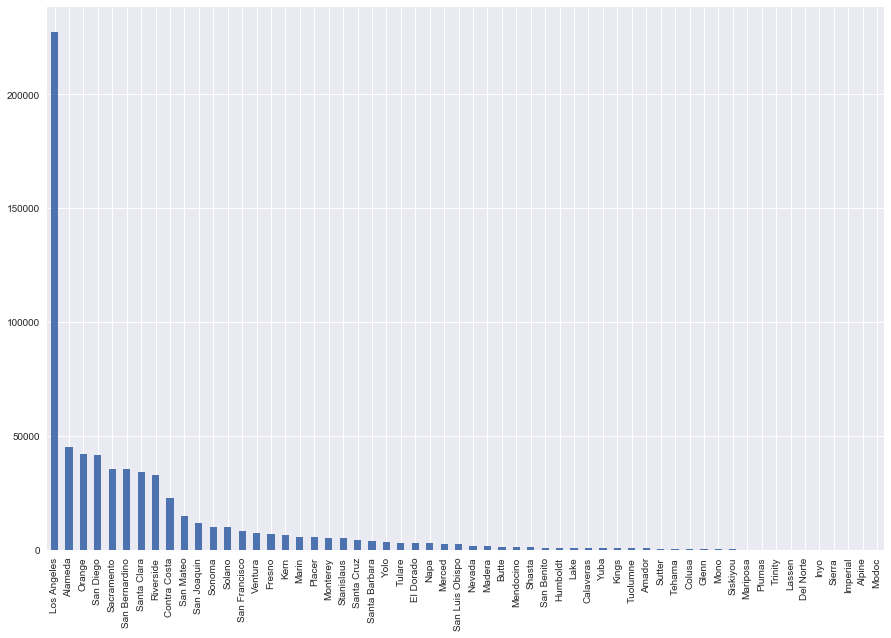

In [5]:
# Define current state
data = df[df["State"] == "CA"]
county_accident = data["County"].value_counts()
sns.set(rc={'figure.figsize':(15,10)})
county_accident.plot(kind="bar", rot=90, stacked = None, figsize=None, fontsize = None, cmap = None)
plt.show()

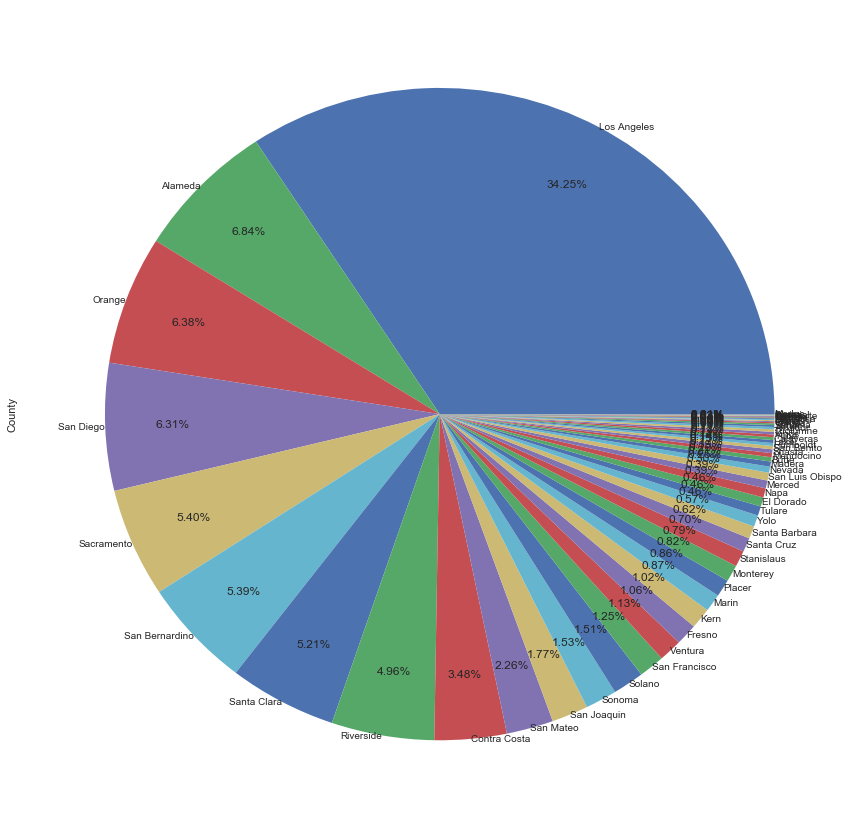

In [20]:
county_accident_percentage = data["County"].value_counts(normalize = True)
county_accident_percentage.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1)
plt.show()

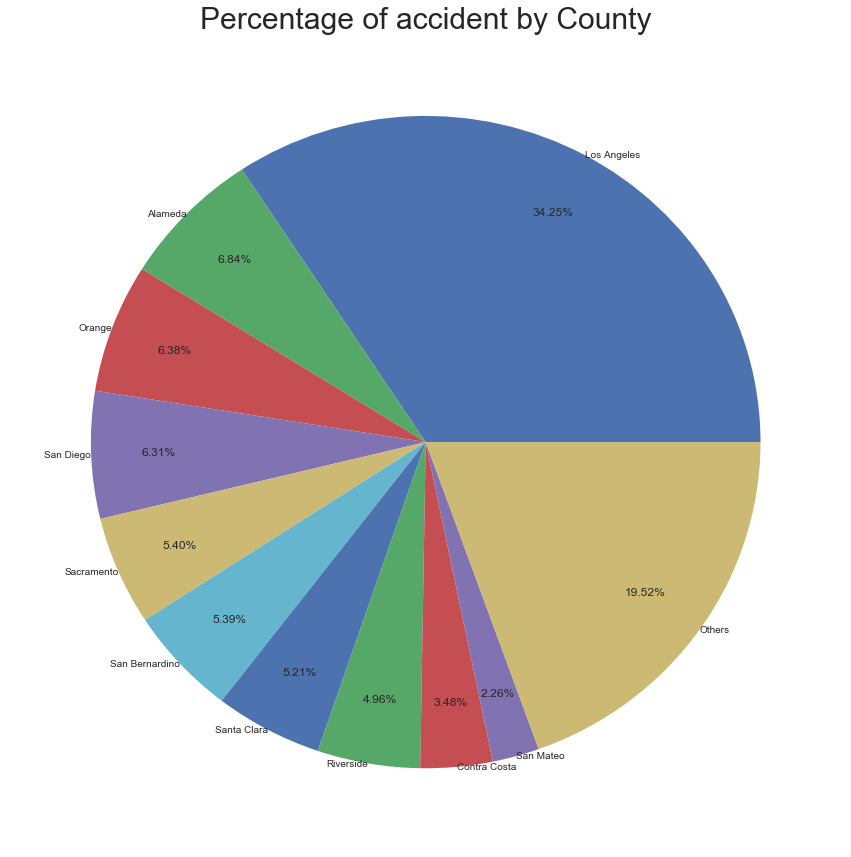

In [21]:
#count percentage with threshold
threshold = 0.02
county_accident_percentage = data["County"].value_counts(normalize = True)
to_remove = county_accident_percentage[county_accident_percentage < threshold].index
others_count = county_accident_percentage[to_remove].sum()
county_accident_percentage_thresholded = county_accident_percentage.drop(labels=to_remove)
county_accident_percentage_thresholded = county_accident_percentage_thresholded.append(pd.Series([others_count], index = ["Others"]))
county_accident_percentage_thresholded.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1)
plt.title("Percentage of accident by County", fontdict = {'fontsize': 30, 'verticalalignment': 'baseline'})
plt.ylabel("")
plt.show()

## Weather Section

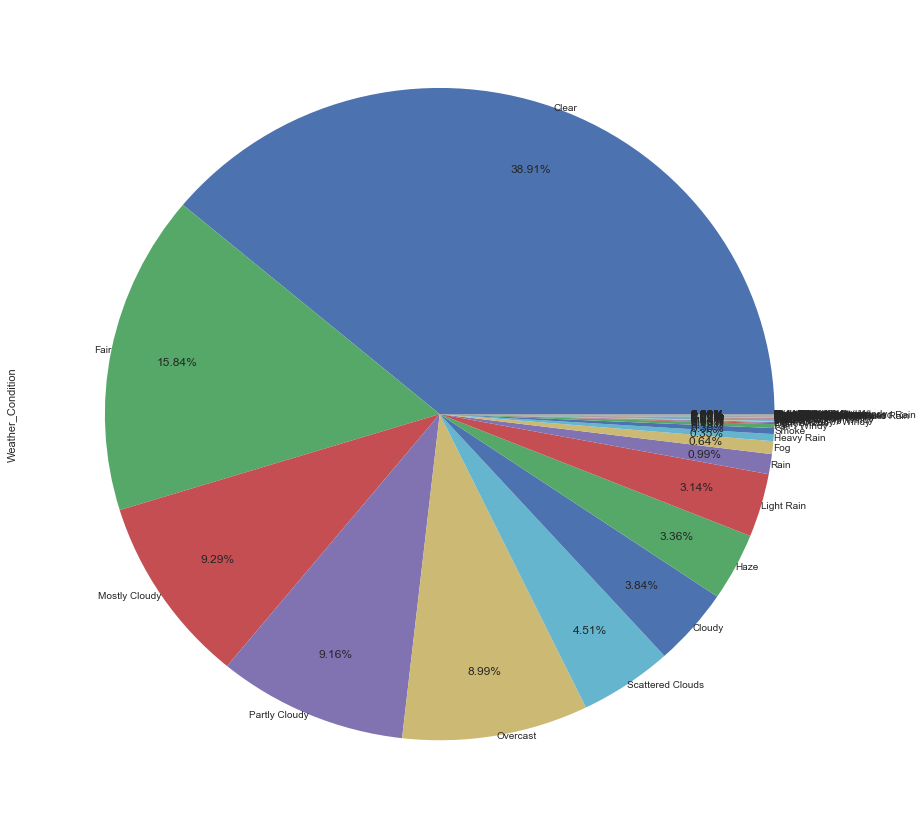

In [22]:
weather = data["Weather_Condition"].value_counts(normalize = True)
weather.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1)
plt.show()

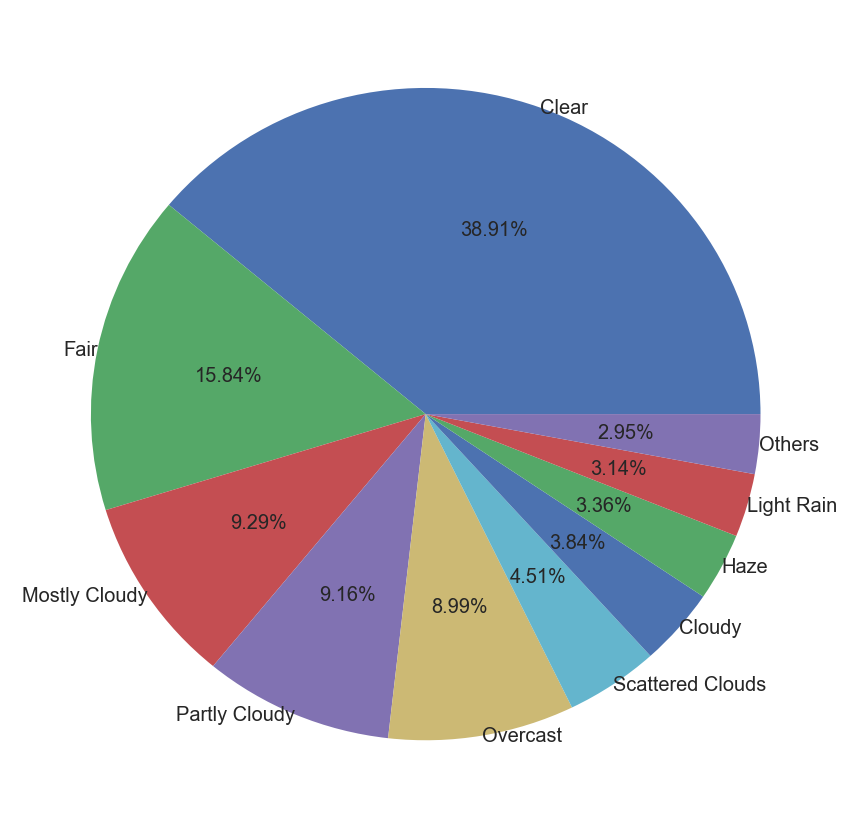

In [23]:
#count percentage with threshold
threshold = 0.02
to_remove = weather[weather < threshold].index
others_count = weather[to_remove].sum()
weather_thresholded = weather.drop(labels=to_remove)
weather_thresholded = weather_thresholded.append(pd.Series([others_count], index = ["Others"]))
weather_thresholded.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.6, labeldistance=1, textprops={'fontsize': 20})
#plt.title("Weather condition", fontdict = {'fontsize': 30, 'verticalalignment': 'baseline'})
plt.ylabel("")
plt.show()

## Severity Section

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


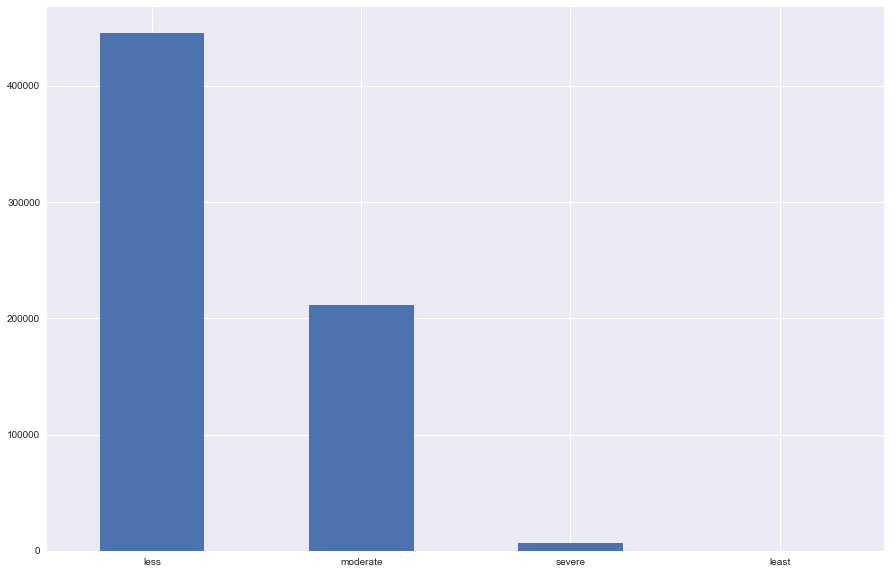

In [24]:
# data["Severity"] = data["Severity"].replace([1, 2, 3, 4], ['least', 'less', 'moderate', 'severe'])
severity = data["Severity"].value_counts()
sns.set(rc={'figure.figsize':(15,10)})
severity.plot(kind="bar", rot=0)
plt.show()

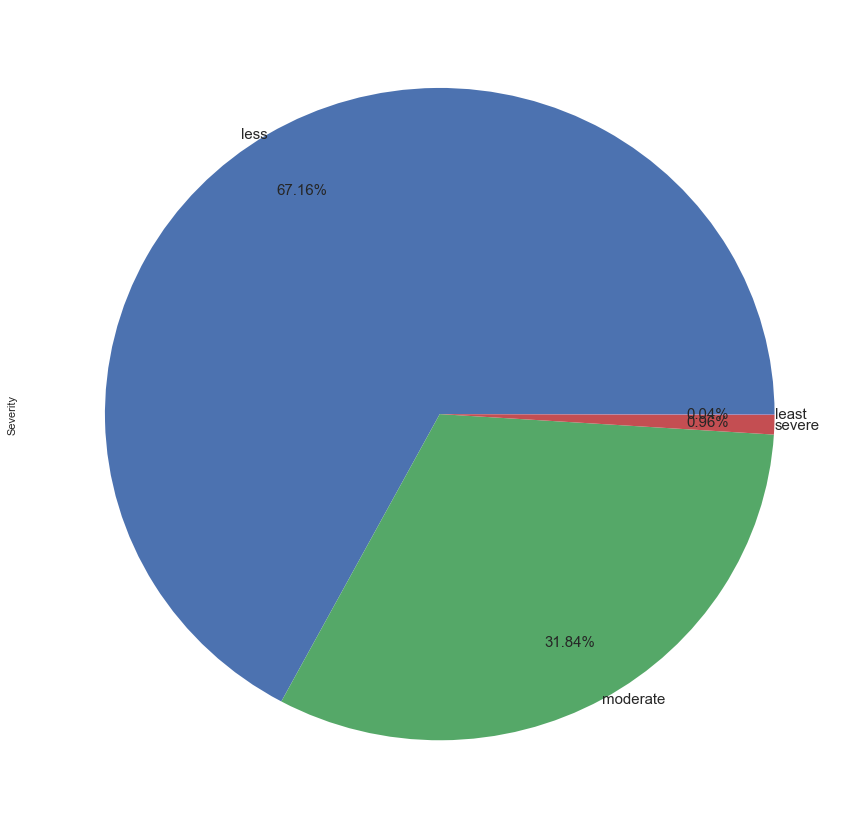

In [25]:
severity_percentage = data["Severity"].value_counts(normalize = True)
severity_percentage.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1, textprops={'fontsize': 15})
plt.show()

In [95]:
top_10_county_idx = county_accident.nlargest(10).index
top_10_county = {'Los Angeles', 'Alameda', 'Orange', 'San Diego', 'Sacramento',
       'San Bernardino', 'Santa Clara', 'Riverside', 'Contra Costa',
       'San Mateo'}

for key, item in county_category:
    if key in top_10_county:
        print(key)
        cur_dataframe = county_category.get_group(key)
        cur_dataframe_weather = cur_dataframe.groupby(['Weather_Condition'])
        for sub_key, _ in cur_dataframe_weather:
            print(sub_key)
            print(cur_dataframe_weather.get_group(sub_key)['Severity'].value_counts())

Alameda
Clear
moderate    8171
less        5556
severe        75
least          7
Name: Severity, dtype: int64
Cloudy
less        1287
moderate     619
severe        15
Name: Severity, dtype: int64
Cloudy / Windy
moderate    8
less        5
Name: Severity, dtype: int64
Fair
less        3813
moderate    1708
severe        47
Name: Severity, dtype: int64
Fair / Windy
less        38
moderate    12
Name: Severity, dtype: int64
Fog
less        95
moderate    49
Name: Severity, dtype: int64
Haze
moderate    543
less        482
severe       17
least         1
Name: Severity, dtype: int64
Heavy Rain
moderate    107
less         64
Name: Severity, dtype: int64
Heavy Rain / Windy
moderate    1
Name: Severity, dtype: int64
Light Drizzle
moderate    34
less        23
severe       1
Name: Severity, dtype: int64
Light Haze
less    1
Name: Severity, dtype: int64
Light Rain
moderate    1100
less         774
severe        14
least          2
Name: Severity, dtype: int64
Light Rain / Windy
less        1

Light Thunderstorms and Rain
less    2
Name: Severity, dtype: int64
Mist
less        7
moderate    3
Name: Severity, dtype: int64
Mostly Cloudy
less        3962
moderate    2293
severe        37
Name: Severity, dtype: int64
Mostly Cloudy / Windy
less        6
moderate    1
Name: Severity, dtype: int64
Overcast
less        2153
moderate    1514
severe        50
least          1
Name: Severity, dtype: int64
Partly Cloudy
less        4387
moderate    2697
severe        53
least          1
Name: Severity, dtype: int64
Partly Cloudy / Windy
less    3
Name: Severity, dtype: int64
Patches of Fog
less    2
Name: Severity, dtype: int64
Rain
less        166
moderate     78
severe        2
Name: Severity, dtype: int64
Rain / Windy
less    1
Name: Severity, dtype: int64
Scattered Clouds
less        1978
moderate    1265
severe        19
least          2
Name: Severity, dtype: int64
Smoke
less        12
moderate    10
Name: Severity, dtype: int64
Thunder
less    1
Name: Severity, dtype: int64
Thund

In [115]:
data["Severity"] = data["Severity"].replace(['least', 'less', 'moderate', 'severe'], [1, 2, 3, 4])

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
Weather = data.Weather_Condition.value_counts()
Weather.sort_index(axis=0, inplace=True)

In [284]:
print(Weather)

Blowing Dust                   40
Blowing Dust / Windy           29
Blowing Sand                    1
Clear                      253070
Cloudy                      24959
                            ...  
Thunderstorms and Rain         58
Volcanic Ash                   12
Widespread Dust                39
Widespread Dust / Windy         1
Wintry Mix                      7
Name: Weather_Condition, Length: 69, dtype: int64


/Users/User/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


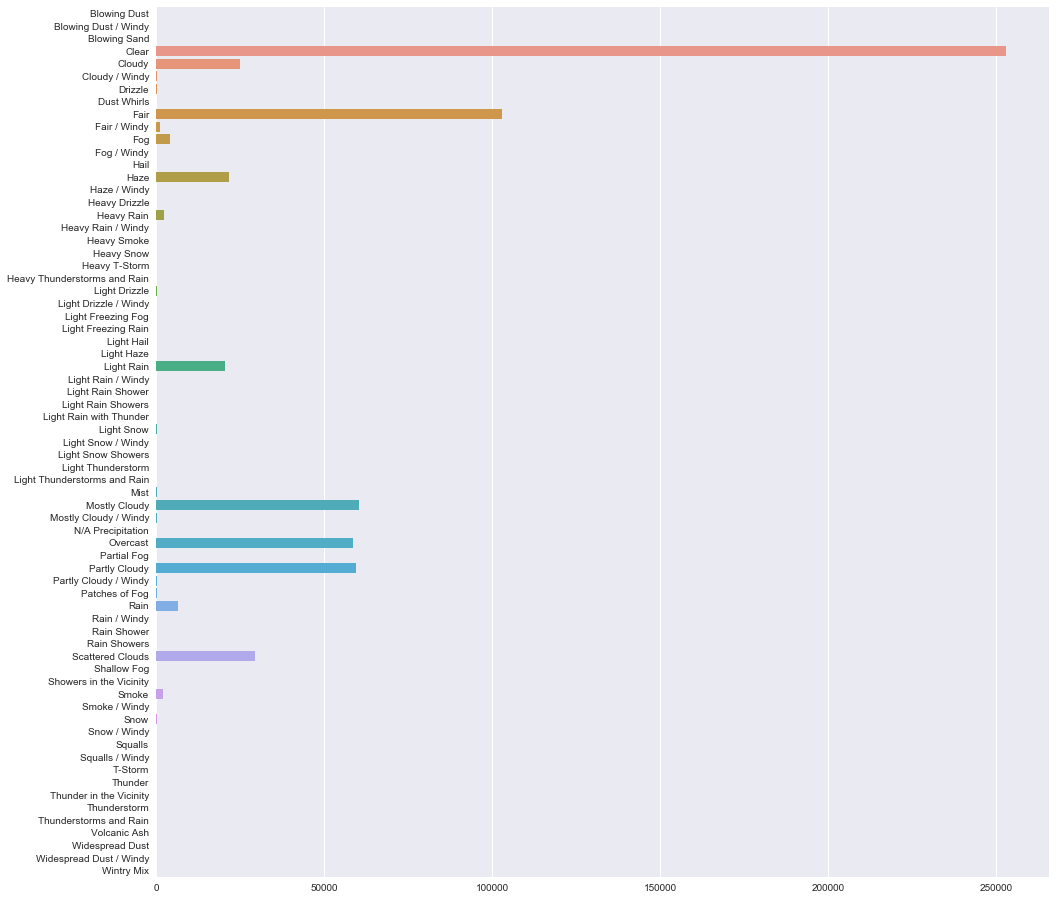

In [285]:
plt.figure(figsize=(16, 16))
sns.barplot(Weather.values, Weather.index)
plt.show()

In [330]:
weather_choosed = ['Blowing Dust', 'Blowing Dust / Windy', 'Blowing Sand', 'Clear', 'Fair', 'Fog / Windy', 
                   'Hail', 'Heavy Drizzle', 'Light Freezing Rain', 'Light Rain', 'Light Snow / Windy', 
                   'Light Snow Showers', 'Mostly Cloudy', 'Thunderstorm', 'Widespread Dust / Windy']
choose_index = True
# weather_choosed.sort()
# print(weather_choosed)
print(len(weather_choosed))

15


In [315]:
choose_index = False

In [331]:
severity_1_by_Weather = []
severity_2_by_Weather = []
severity_3_by_Weather = []
severity_4_by_Weather = []
if choose_index:
    for i in weather_choosed:
        print(i)
        severity_1_by_Weather.append(data[(data['Severity']==1)&(data['Weather_Condition']==i)].count()['ID'])
        severity_2_by_Weather.append(data[(data['Severity']==2)&(data['Weather_Condition']==i)].count()['ID'])
        severity_3_by_Weather.append(data[(data['Severity']==3)&(data['Weather_Condition']==i)].count()['ID'])
        severity_4_by_Weather.append(data[(data['Severity']==4)&(data['Weather_Condition']==i)].count()['ID'])
else:  
    for i in Weather.index:
        print(i)
        severity_1_by_Weather.append(data[(data['Severity']==1)&(data['Weather_Condition']==i)].count()['ID'])
        severity_2_by_Weather.append(data[(data['Severity']==2)&(data['Weather_Condition']==i)].count()['ID'])
        severity_3_by_Weather.append(data[(data['Severity']==3)&(data['Weather_Condition']==i)].count()['ID'])
        severity_4_by_Weather.append(data[(data['Severity']==4)&(data['Weather_Condition']==i)].count()['ID'])

Blowing Dust
Blowing Dust / Windy
Blowing Sand
Clear
Fair
Fog / Windy
Hail
Heavy Drizzle
Light Freezing Rain
Light Rain
Light Snow / Windy
Light Snow Showers
Mostly Cloudy
Thunderstorm
Widespread Dust / Windy


In [332]:
print(severity_1_by_Weather)
print(severity_2_by_Weather)
print(severity_3_by_Weather)
print(severity_4_by_Weather)

[0, 0, 0, 130, 9, 0, 0, 0, 0, 4, 0, 0, 23, 0, 0]
[36, 27, 0, 158039, 85512, 8, 1, 13, 1, 13436, 6, 0, 39588, 9, 0]
[4, 2, 1, 92257, 16593, 0, 1, 16, 1, 6840, 0, 0, 20335, 12, 1]
[0, 0, 0, 2644, 902, 0, 0, 3, 0, 157, 0, 1, 494, 0, 0]


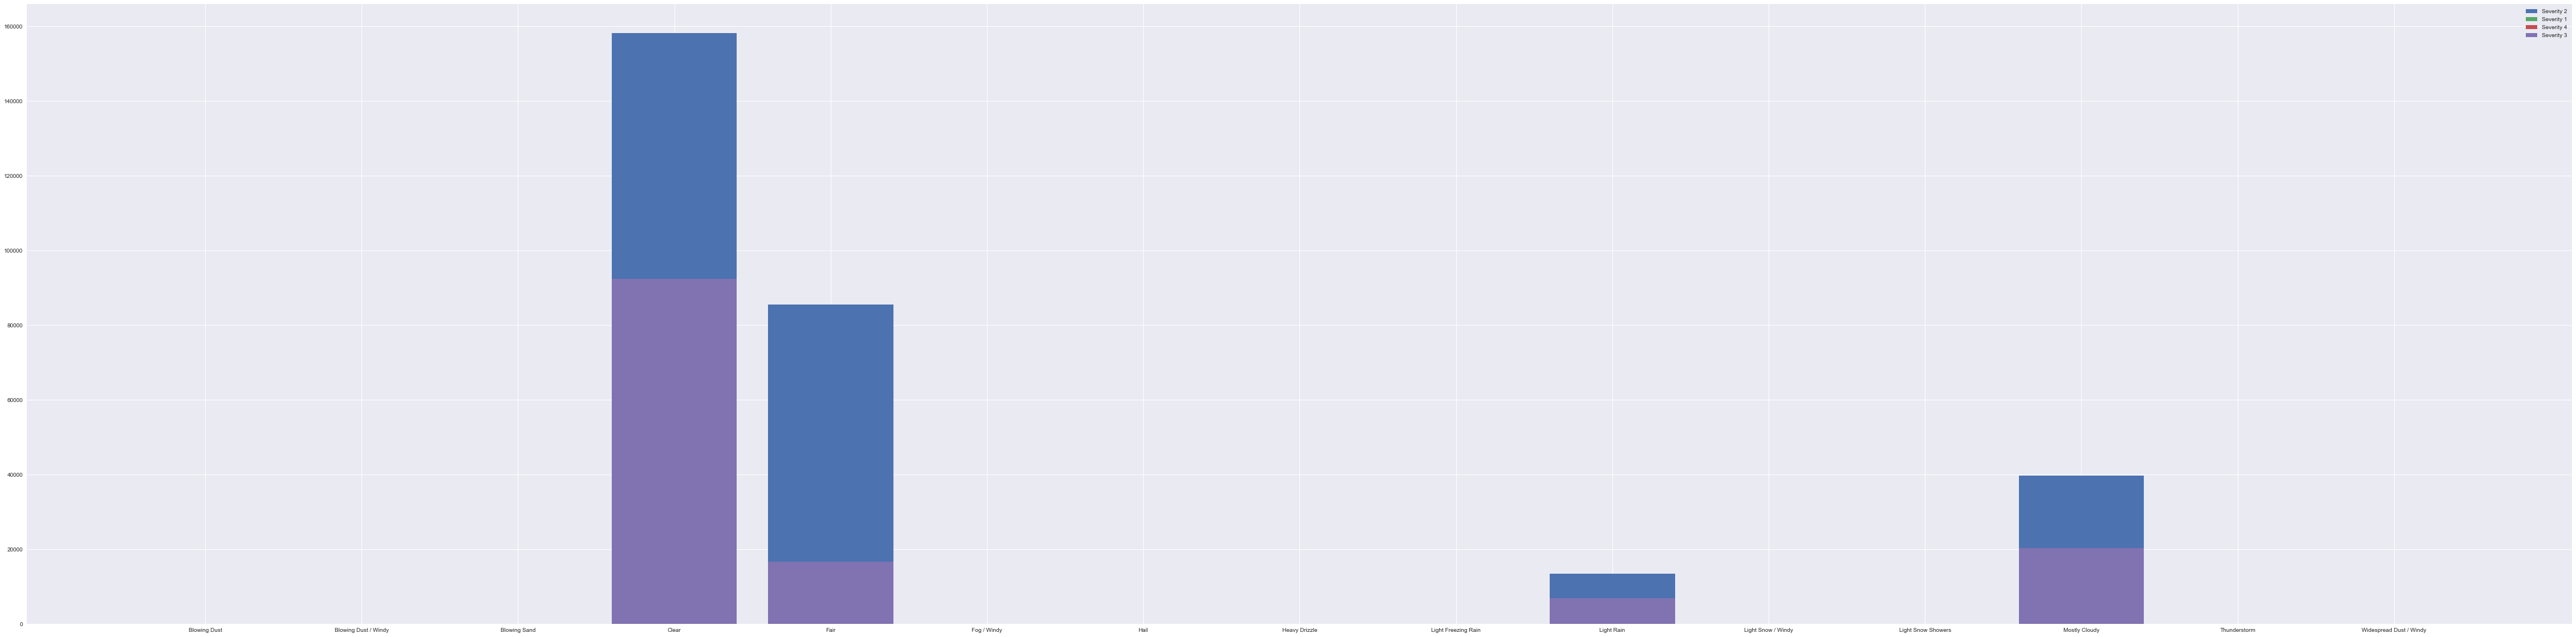

In [333]:
plt.figure(figsize=(80, 20))

if choose_index:
    plt.bar(weather_choosed, severity_2_by_Weather, label='Severity 2')
    plt.bar(weather_choosed, severity_1_by_Weather, label='Severity 1')
    plt.bar(weather_choosed, severity_4_by_Weather, label='Severity 4')
    plt.bar(weather_choosed, severity_3_by_Weather, label='Severity 3')
else:
    plt.bar(Weather.index, severity_2_by_Weather, label='Severity 2')
    plt.bar(Weather.index, severity_3_by_Weather, label='Severity 3')
    plt.bar(Weather.index, severity_4_by_Weather, label='Severity 4')
    plt.bar(Weather.index, severity_1_by_Weather, label='Severity 1')

plt.legend()
plt.show()

In [334]:
percentage_severity_1 = []
percentage_severity_2 = []
percentage_severity_3 = []
percentage_severity_4 = []
if choose_index:
    for i, val in enumerate(weather_choosed):
        percentage_severity_1.append((severity_1_by_Weather[i]/Weather[val])*100)
        percentage_severity_2.append((severity_2_by_Weather[i]/Weather[val])*100)
        percentage_severity_3.append((severity_3_by_Weather[i]/Weather[val])*100)
        percentage_severity_4.append((severity_4_by_Weather[i]/Weather[val])*100)
else:
    for i in range(len(severity_1_by_Weather)):
        percentage_severity_1.append((severity_1_by_Weather[i]/Weather[i])*100)
        percentage_severity_2.append((severity_2_by_Weather[i]/Weather[i])*100)
        percentage_severity_3.append((severity_3_by_Weather[i]/Weather[i])*100)
        percentage_severity_4.append((severity_4_by_Weather[i]/Weather[i])*100)

In [335]:
print(percentage_severity_1)
print(percentage_severity_2)
print(percentage_severity_3)
print(percentage_severity_4)

[0.0, 0.0, 0.0, 0.05136918639111708, 0.00873650695037664, 0.0, 0.0, 0.0, 0.0, 0.019572344277535843, 0.0, 0.0, 0.03805426869622767, 0.0, 0.0]
[90.0, 93.10344827586206, 0.0, 62.44872960050579, 83.00846470451192, 100.0, 50.0, 40.625, 50.0, 65.7435044282429, 100.0, 0.0, 65.49966909331569, 42.857142857142854, 0.0]
[10.0, 6.896551724137931, 100.0, 36.4551309914253, 16.107206647511067, 0.0, 50.0, 50.0, 50.0, 33.468708714586285, 0.0, 0.0, 33.64493712772998, 57.14285714285714, 100.0]
[0.0, 0.0, 0.0, 1.0447702216777968, 0.8755921410266366, 0.0, 0.0, 9.375, 0.0, 0.7682145128932818, 0.0, 100.0, 0.8173395102581072, 0.0, 0.0]


In [336]:
cur_idx = 9
print(percentage_severity_3[cur_idx]+percentage_severity_2[cur_idx]+percentage_severity_1[cur_idx]+percentage_severity_4[cur_idx])

100.0


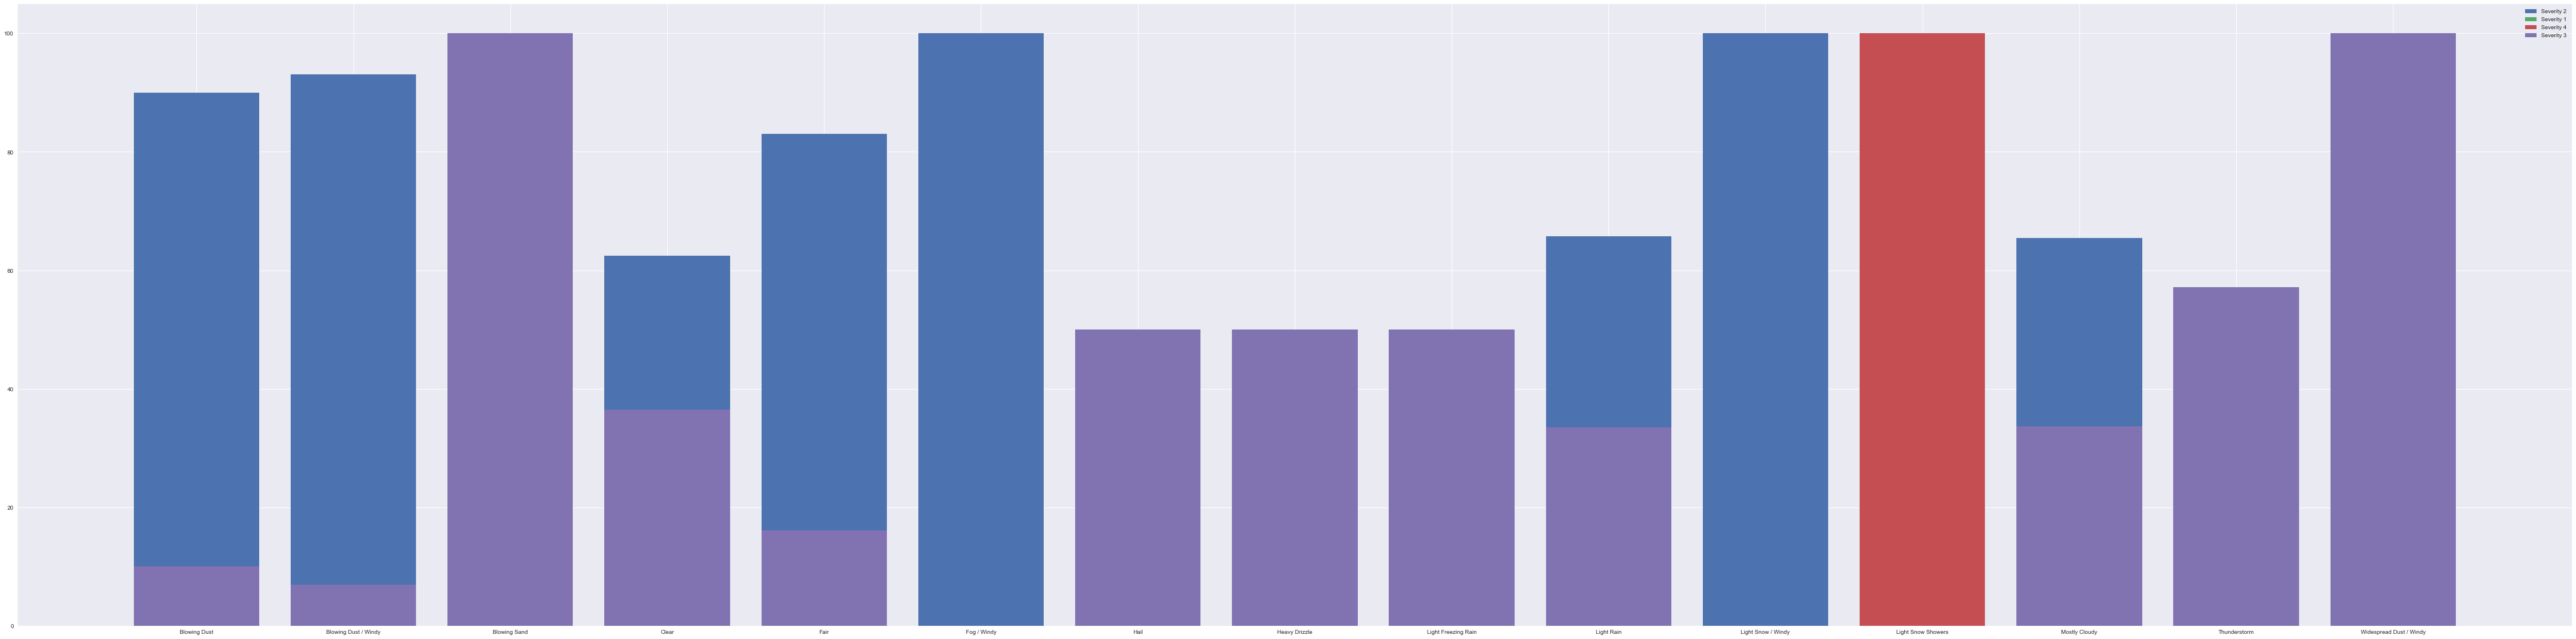

In [337]:
plt.figure(figsize=(80, 20))

if choose_index:
    plt.bar(weather_choosed, percentage_severity_2, label='Severity 2')
    plt.bar(weather_choosed, percentage_severity_1, label='Severity 1')
    plt.bar(weather_choosed, percentage_severity_4, label='Severity 4')
    plt.bar(weather_choosed, percentage_severity_3, label='Severity 3')
else:
    plt.bar(Weather.index, percentage_severity_2, label='Severity 2')
    plt.bar(Weather.index, percentage_severity_1, label='Severity 1')
    plt.bar(Weather.index, percentage_severity_4, label='Severity 4')
    plt.bar(Weather.index, percentage_severity_3, label='Severity 3')

plt.legend()
plt.show()

In [301]:
for i in range(len(percentage_severity_1)):
    if percentage_severity_4[i] + percentage_severity_3[i] >= percentage_severity_1[i] + percentage_severity_2[i]:
        weather_choosed.append(Weather.index[i])

In [305]:
weather_choosed.sort()
print(weather_choosed)

['Blowing Sand', 'Hail', 'Heavy Drizzle', 'Light Freezing Rain', 'Light Snow Showers', 'Thunderstorm', 'Widespread Dust / Windy']
